In [7]:
# Importing all required libraries
from google.colab import drive
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import os
import json

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
csv_path = "/content/drive/MyDrive/xy_data.csv"

df = pd.read_csv(csv_path)
print("Columns:", df.columns.tolist())
print("Rows:", len(df))
df.head()

Columns: ['x', 'y']
Rows: 1500


,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


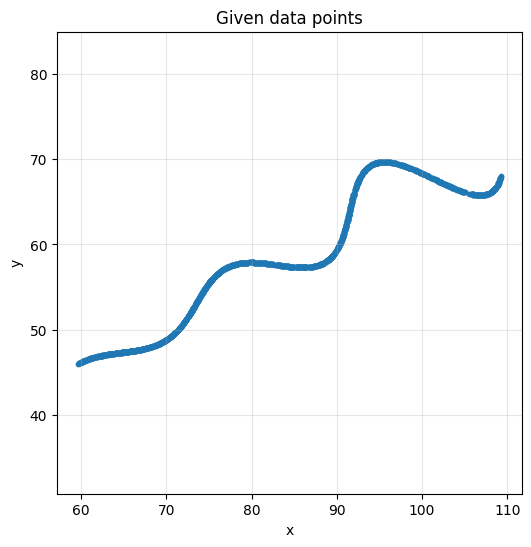

In [10]:
# Extracting x and y and naming them as x_obs and y_obs
x_obs = df.iloc[:, 0].astype(float).values
y_obs = df.iloc[:, 1].astype(float).values

# Number of data points
n = len(x_obs)

# Constructing t uniformly in the range [6, 60]
t = np.linspace(6.0, 60.0, n)

# Plotting the observed points
plt.figure(figsize=(6,6))
plt.scatter(x_obs, y_obs, s=10, alpha=0.9)
plt.title("Given data points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.axis("equal")
plt.show()

In [12]:
def model(params, t):

    # Computes predicted x(t) and y(t) using the given parametric equations.
    # params = [theta, M, X]

    theta, M, X = params

    sin_part = np.sin(0.3 * t)
    exp_part = np.exp(M * np.abs(t))

    x_pred = (
        t * np.cos(theta)
        - exp_part * sin_part * np.sin(theta)
        + X
    )

    y_pred = (
        42
        + t * np.sin(theta)
        + exp_part * sin_part * np.cos(theta)
    )

    return x_pred, y_pred

def residuals(params, t, x_obs, y_obs):

    # Computes prediction errors (residuals) between model and observed points.
    # Returns a single concatenated vector of all errors.

    x_pred, y_pred = model(params, t)

    x_error = x_pred - x_obs
    y_error = y_pred - y_obs

    return np.concatenate([x_error, y_error])

In [25]:
# parameter bounds
theta_min = 0
theta_max = 50 * np.pi / 180

bounds_lower = [theta_min, -0.05, 0]
bounds_upper = [theta_max,  0.05, 100]

# initial guess
initial_guess = [ 0.4, -0.02, 55 ]

# run least squares (basic version)
result = least_squares(
    residuals,
    initial_guess,
    args=(t, x_obs, y_obs),
    bounds=(bounds_lower, bounds_upper)
)

theta_fit, M_fit, X_fit = result.x

print("theta (rad):", theta_fit)
print("theta (deg):", theta_fit * 180/np.pi)
print("M:", M_fit)
print("X:", X_fit)

theta (rad): 0.5163051222957233
theta (deg): 29.58210444853077
M: -0.04999999999562039
X: 55.01340779732458


Total L1: 38102.141701148
Mean L1 per point: 25.401427800765333


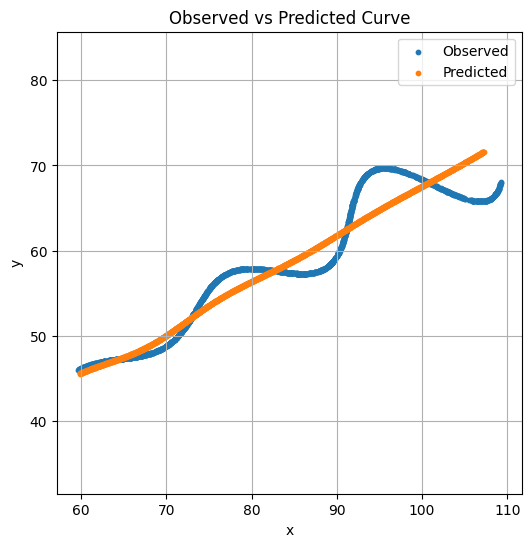

In [26]:
# Computing predictions using fitted parameters
x_pred, y_pred = model([theta_fit, M_fit, X_fit], t)

# L1 distance
l1_total = np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))
l1_mean = l1_total / len(x_obs)

print("Total L1:", l1_total)
print("Mean L1 per point:", l1_mean)

# Plotting observed vs predicted
plt.figure(figsize=(6,6))
plt.scatter(x_obs, y_obs, s=10, label="Observed")
plt.scatter(x_pred, y_pred, s=10, label="Predicted")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Observed vs Predicted Curve")
plt.axis("equal")
plt.grid(True)
plt.show()

In [28]:
theta_val = theta_fit
M_val = M_fit
X_val = X_fit

latex_string = (
    r"\left("
    r"t\cos(" + str(theta_val) + r")"
    r" - e^{" + str(M_val) + r"\left|t\right|}\cdot\sin(0.3t)\sin(" + str(theta_val) + r")"
    r" + " + str(X_val) + r","
    r"42 + t\sin(" + str(theta_val) + r")"
    r" + e^{" + str(M_val) + r"\left|t\right|}\cdot\sin(0.3t)\cos(" + str(theta_val) + r")"
    r"\right)"
)

print("LaTeX_format")
print(latex_string)

LaTeX_format
\left(t\cos(0.5163051222957233) - e^{-0.04999999999562039\left|t\right|}\cdot\sin(0.3t)\sin(0.5163051222957233) + 55.01340779732458,42 + t\sin(0.5163051222957233) + e^{-0.04999999999562039\left|t\right|}\cdot\sin(0.3t)\cos(0.5163051222957233)\right)
